In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from stingray.pulse import epoch_folding_search
from stingray.pulse import get_orbital_correction_from_ephemeris_file
import Important_Functions as IF
import scipy.stats as st
from importlib import reload

/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:25: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:40: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")


In [2]:
#To reload functions - Keep in mind !
reload(IF)

<module 'Important_Functions' from '/Users/samsonmercier/Desktop/UNIGE/ap-lab-i-2022/notebooks/Important_Functions.py'>

## Importing data

In [3]:
#Retrieving data for source file
Time_phase_file = pf.open('sourceA.evt')

#Getting event arrival time data
Time_phase_data=Time_phase_file[1].data

## Getting GTIs

In [4]:
new_gti = IF.get_GTIs(Time_phase_file[2])

## Getting the event arrival times taking into account the orbital correction

In [5]:
#Setting up the parameters used by the Stingray documentation to correct the event arrival times
correct_orbital_time = IF.get_orbital_correction(Time_phase_file[1], 'orbit_t2.txt')

/opt/anaconda3/envs/testenv/lib/python3.10/site-packages/stingray/utils.py:142: UserWarning: SIMON says: Assuming events are already referred to the solar system barycenter (timescale is TDB)
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
2022-10-31 10:10:33.930 | DEBUG    | pint.toa:__init__:1310 - No pulse number flags found in the TOAs
2022-10-31 10:10:33.930 | DEBUG    | pint.toa:compute_TDBs:2139 - Computing TDB columns.
2022-10-31 10:10:33.931 | DEBUG    | pint.toa:compute_TDBs:2164 - Using EPHEM = DE405 for TDB calculation.
2022-10-31 10:10:34.001 | DEBUG    | pint.toa:compute_posvels:2255 - Computing PosVels of observatories and Earth, using DE405
2022-10-31 10:10:34.008 | DEBUG    | pint.toa:compute_posvels:2310 - SSB obs pos [0. 0. 0.] m
2022-10-31 10:10:35.075 | INFO     | pint.solar_system_ephemerides:_load_kernel_link:54 - Set solar system ephemeris to de405 from download
2022-10-31 10:10:35.104 | DEBUG    | pint.toa:compute_posvels:2324 - Adding columns ssb_

## Using the event arrival times with orbital correction and the Stingray function epoch_folding_search to find pulse frequency

In [6]:
correct_list, guess_freq = IF.get_pulse_freq(0.208, 0.209, 1000, correct_orbital_time, new_gti, 20000)

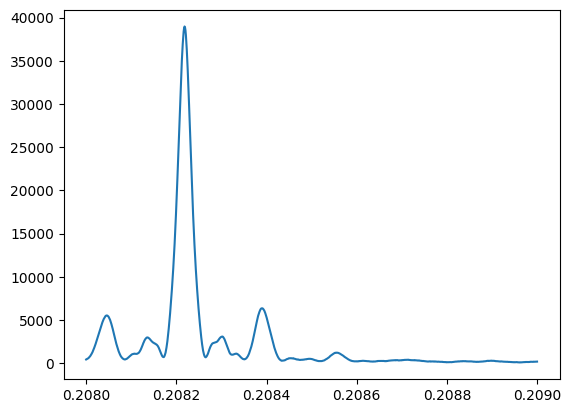

In [7]:
#Plotting the power as a function energy
plt.plot(correct_list[0], correct_list[1])
plt.show()

# Getting the pulse profile matrix with orbitally corrected time segments

## Segmenting data

In [8]:
reload(IF)
number_segments = 30
time_seg, PI_seg = IF.segment_time(Time_phase_data['PI'], correct_orbital_time, number_segments)

## Get the periodogram for the segments

In [9]:
freq_seg, power_seg = IF.get_power_and_freq(time_seg, PI_seg, number_segments)

## Getting the first harmonic frequencies and regression coefficients

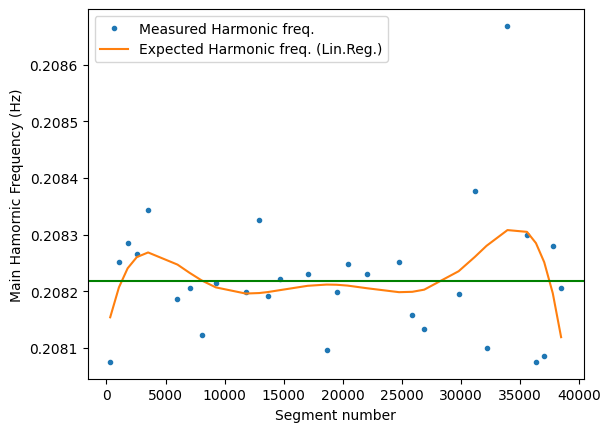

In [10]:
reload(IF)
reg, bins = IF.Harmonic_funk(6, 0.01, Time_phase_data['TIME'][0], time_seg, freq_seg, power_seg, guess_freq)

## Getting the pulse profile matrix

2
2
7
10
4
6
5
11
2
6
7
2
11
5
5
11
9
10
6
5
9
10
7
6
9
12
12
5
6
6


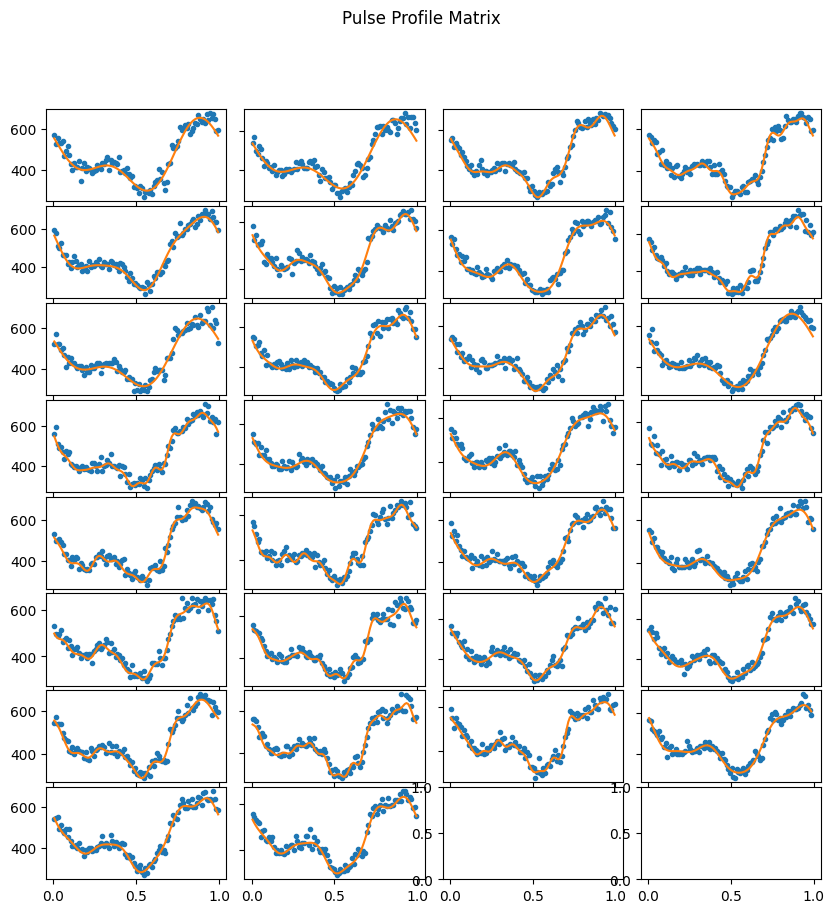

In [54]:
reload(IF)
orders, model_phases, counts, phasefolded_time = IF.pulse_profile_matrix(time_seg, correct_orbital_time[0], [guess_freq], 'Pulse Profile Matrix', 30)



# Getting the ENERGY pulse profile matrix

In [98]:
len(correct_orbital_time)

1387011

In [ ]:
reload(IF)
num_segments = -50
E_min = 120
E_max = 2800
energy_time_segments, energy_segments = IF.segment_energywise(correct_orbital_time, 
                                                              Time_phase_data['PI'], E_min, E_max, num_segments, True, [guess_freq])

10 2.82842712474619
510 22.516660498395407
1010 31.622776601683793
1510 38.67815921162743
2010 44.5869936192159
2510 49.85980344927164
3010 54.58021619598076
3510 58.923679450624945
4010 62.95236294214856
4510 66.783231428256
5010 70.36334272900912
5510 73.81056834898374
6010 77.09085548883213
6510 80.24961059095553
7010 83.28265125462806
7510 86.17424209124209
8010 88.99438184514796
8510 91.73330910852394
9010 94.38749917229507
9510 96.99484522385713
10010 99.498743710662
10510 101.96568050084304
11010 104.35516278555652
11510 106.70520137275408
12010 108.98623766329399
12510 111.25196627475849
13010 113.43279948938931
13510 115.58979193683152
14010 117.70726400694224
14510 119.76643937263894
15010 121.81953866272848
15510 123.81033882515628
16010 125.7895067165779
16510 127.73409881468613
17010 129.6572404457229
17510 131.53706701914865
18010 133.41289293018124
18510 135.26270735128733
19010 137.0766209096212
19510 138.8380351344688
20010 140.59871976657539
20510 143.21312788986907
2

166010 407.44324758179516
166510 408.05636865511605
167010 408.6685698705003
167510 409.2798553557211
168010 409.89022920777217
168510 410.4996954931879
169010 411.1082582483597
169510 411.71592147984757
170010 412.3226891646881
170510 412.92856525069806
171010 413.533553656774
171510 414.13765827318815
172010 414.7408829618802
172510 415.34323155674514
173010 415.9447078639179
173510 416.5453156620538
174010 417.14505870260524
174510 417.7439407100957
175010 418.34196538238905
175510 418.9391363909559
176010 419.5354573811372
176510 420.13093197240306
177010 420.7255637586097
177510 421.3193563082522
178010 421.91231316471436
178510 422.5044378465154
179010 423.09573384755373
179510 423.68620463734715
180010 424.2758536612707
180510 424.86468434079103
181010 425.45270007369794
181510 426.0399042343334
182010 426.6263001738172
182510 427.2118912202702
183010 427.7966806790347
183510 428.3806718328921
184010 428.96386794227783
184510 429.546272245494
185010 430.12788795891856
185510 430

329010 573.593933022308
329510 574.0296159607097
330010 574.4649684706632
330510 574.8999913028351
331010 575.3346852050552
331510 575.7690509223294
332010 576.203089196856
332510 576.6368007680398
333010 577.070186372507
333510 577.50324674412
334010 577.9359826139915
334510 578.3683947104994
335010 578.8004837593003
335510 579.2322504833446
336010 579.66369560289
336510 580.0948198355162
337010 580.5256238961377
337510 580.9561084970189
338010 581.3862743477869
338510 581.8161221554453
339010 582.2456526243884
339510 582.6748664564142
340010 583.1037643507372
340510 583.5323470040029
341010 583.9606151103001
341510 584.3885693611743
342010 584.8162104456408
342510 585.2435390501975
343010 585.6705558588377
343510 586.0972615530634
344010 586.5236568118971
344510 586.949742311895
345010 587.3755187271598
345510 587.8009867293522
346010 588.226146987704
346510 588.6510001690306
347010 589.0755469377422
347510 589.4997879558566
348010 589.9237238830119
348510 590.3473553764766
349010 59

494010 702.8584494761375
494510 703.2140499165243
495010 703.5694706281677
495510 703.9247118833092
496010 704.279773953505
496510 704.6346571096258
497010 704.9893616218616
497510 705.3438877597224
498010 705.6982357920417
498510 706.0524059869776
499010 706.406398612017
499510 706.7602139339763
500010 707.1138522190043
500510 707.4673137325851
501010 707.8205987395394
501510 708.1737075040276
502010 708.5266402895518
502510 708.8793973589584
503010 709.2319789744396
503510 709.5843853975368
504010 709.9366168891416
504510 710.2886737094997
505010 710.6405561182108
505510 710.9922643742335
506010 711.3437987358855
506510 711.6951594608468
507010 712.0463468061612
507510 712.3973610282396
508010 712.7482023828612
508510 713.0988711251757
509010 713.4493675097063
509510 713.799691790351
510010 714.1498442203848
510510 714.4998250524628
511010 714.849634538621
511510 715.1992729302792
512010 715.548740478243
512510 715.8980374327059
513010 716.2471640432511
513510 716.5961205588543
51401

659010 811.7943089231409
659510 812.1022103159182
660010 812.4099950148325
660510 812.7176631524628
661010 813.0252148611382
661510 813.3326502729371
662010 813.6399695196887
662510 813.947172732973
663010 814.2542600441217
663510 814.5612315842193
664010 814.8680874841032
664510 815.1748278743646
665010 815.4814528853492
665510 815.7879626471575
666010 816.0943572896457
666510 816.4006369424267
667010 816.7068017348698
667510 817.0128517961024
668010 817.3187872550097
668510 817.6246082402364
669010 817.9303148801858
669510 818.2359073030223
670010 818.5413856366702
670510 818.8467500088158
671010 819.1520005469071
671510 819.4571373781547
672010 819.7621606295329
672510 820.0670704277791
673010 820.3718668993957
673510 820.6765501706504
674010 820.9811203675757
674510 821.2855776159715
675010 821.5899220414038
675510 821.8941537692065
676010 822.1982729244813
676510 822.5022796320993
677010 822.8061740167001
677510 823.1099562026934
678010 823.4136263142601
678510 823.7171844753514
6

824010 907.7499655742214
824510 908.0253300431657
825010 908.3006110313919
825510 908.5758086147792
826010 908.850922869092
826510 909.1259538699795
827010 909.4009016929772
827510 909.6757664135063
828010 909.9505481068738
828510 910.2252468482733
829010 910.4998627127849
829510 910.7743957753753
830010 911.0488461108987
830510 911.3232137940962
831010 911.5974988995966
831510 911.8717015019164
832010 912.14582167546
832510 912.4198594945202
833010 912.6938150332783
833510 912.9676883658042
834010 913.2414795660566
834510 913.5151887078836
835010 913.7888158650226
835510 914.0623611111006
836010 914.3358245196346
836510 914.6092061640315
837010 914.8825061175888
837510 915.1557244534944
838010 915.4288612448265
838510 915.7019165645554
839010 915.9748904855417
839510 916.2477830805376
840010 916.5205944221876
840510 916.7933245830274
841010 917.065973635485
841510 917.3385416518811
842010 917.6110287044287
842510 917.8834348652339
843010 918.1557602062952
843510 918.4280047995053
8440

989010 994.4898189524114
989510 994.7411723659577
990010 994.9924622830064
990510 995.2436887516544
991010 995.4948518199378
991510 995.7459515358323
992010 995.9969879472527
992510 996.2479611020541
993010 996.4988710480308
993510 996.7497178329171
994010 997.0005015043873
994510 997.2512221100559
995010 997.5018796974771
995510 997.7524743141457
996010 998.0030060074969
996510 998.2534748249064
997010 998.5038808136901
997510 998.7542240211052
998010 999.0045044943491
998510 999.2547222805604
999010 999.5048774268188
999510 999.7549699801447
1000010 1000.0049999875001
1000510 1000.254967495788
1001010 1000.5048725518532
1001510 1000.7547152024816
1002010 1001.0044954944009
1002510 1001.2542134742804
1003010 1001.5038691887315
1003510 1001.7534626843074
1004010 1002.0029940075029
1004510 1002.2524632047556
1005010 1002.5018703224449
1005510 1002.7512154068924
1006010 1003.0004985043627
1006510 1003.2497196610623
1007010 1003.4988789231405
1007510 1003.7479763366898
1008010 1003.997011

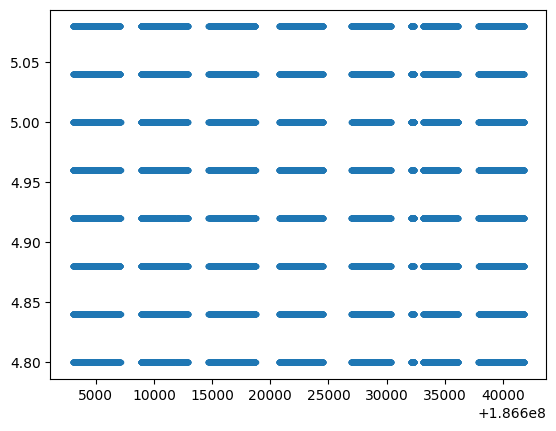

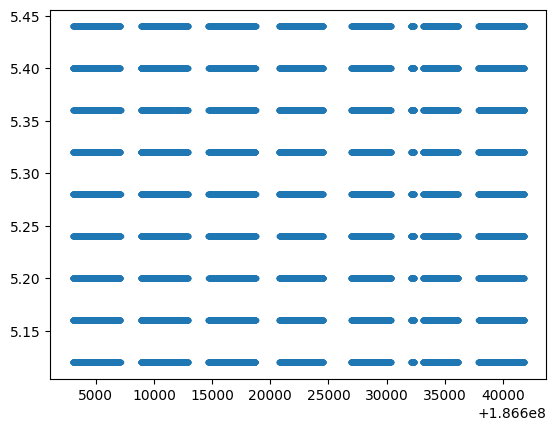

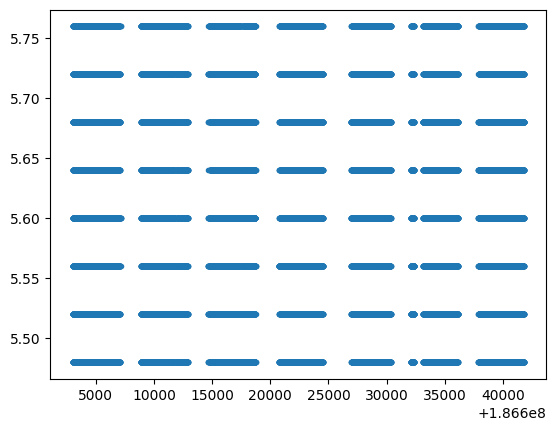

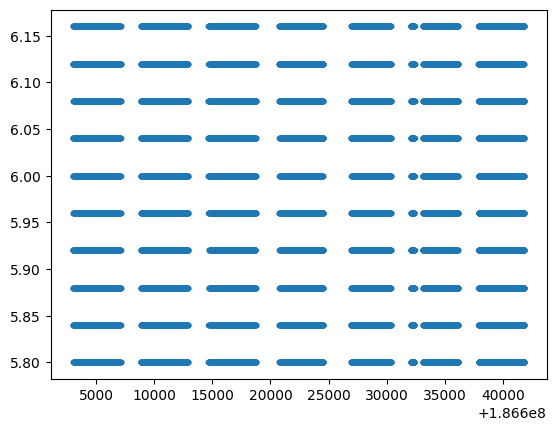

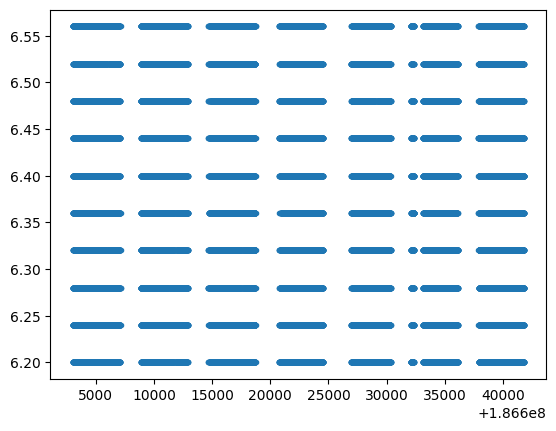

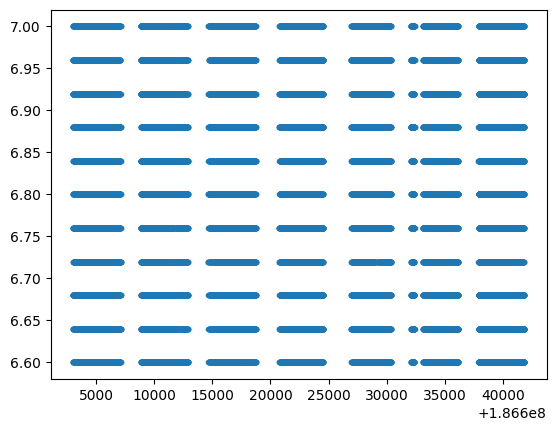

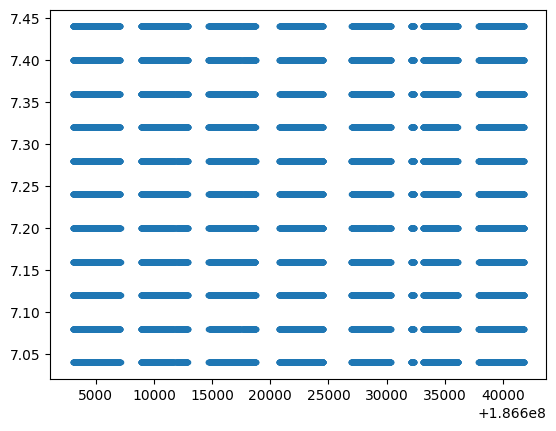

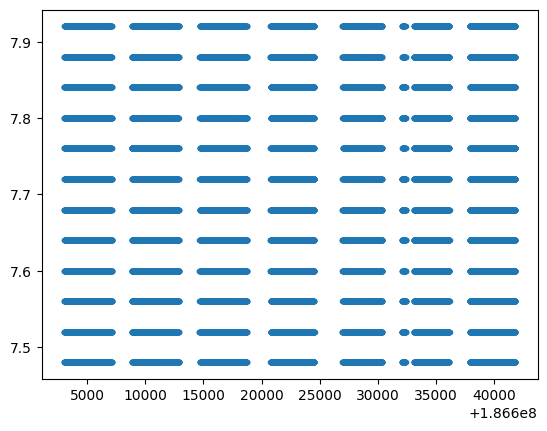

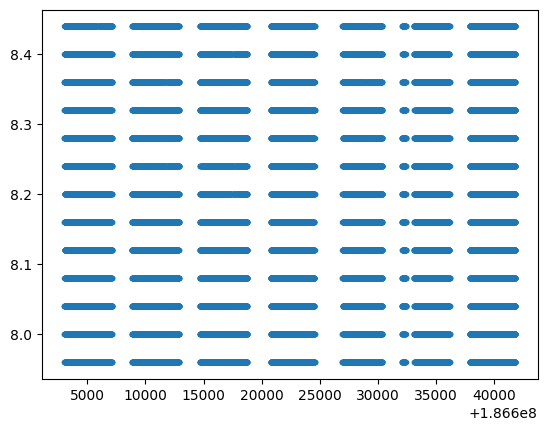

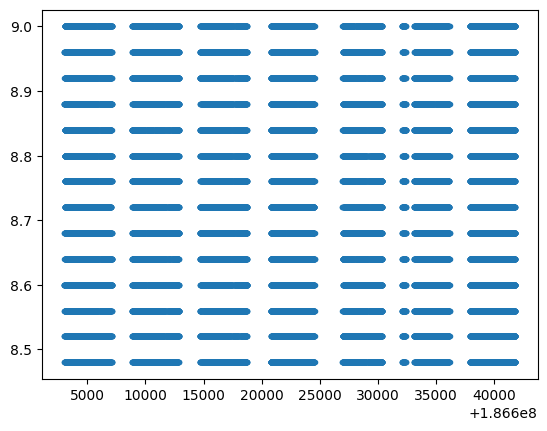

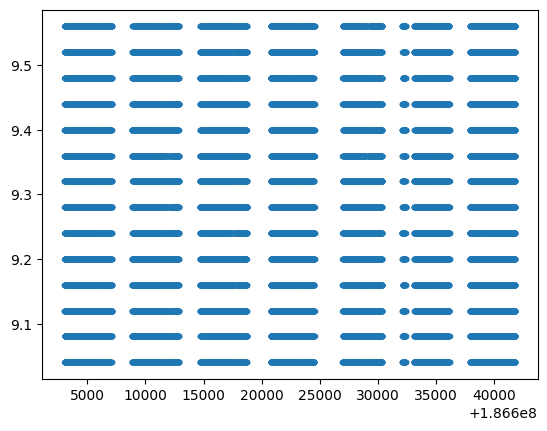

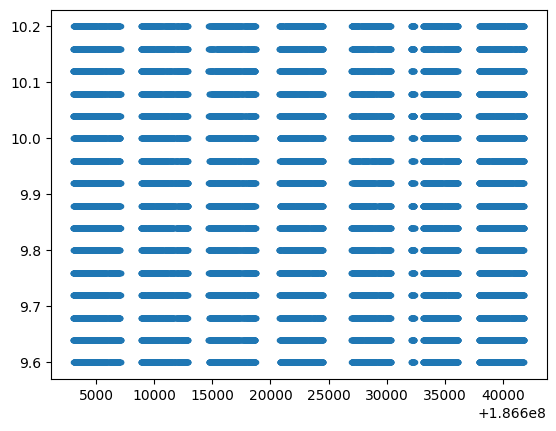

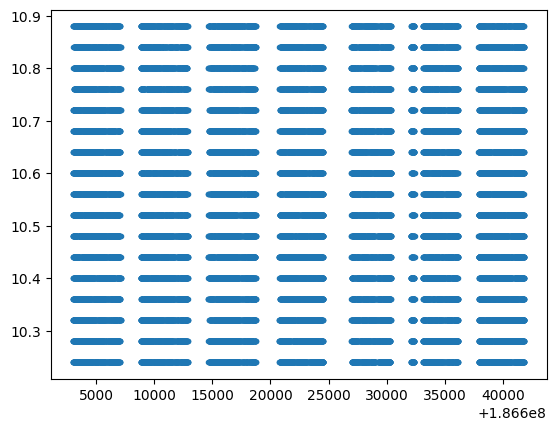

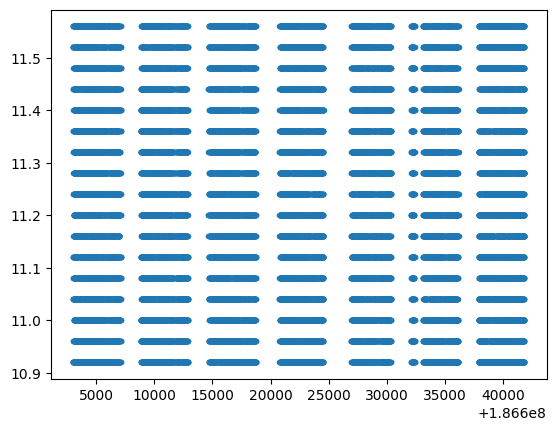

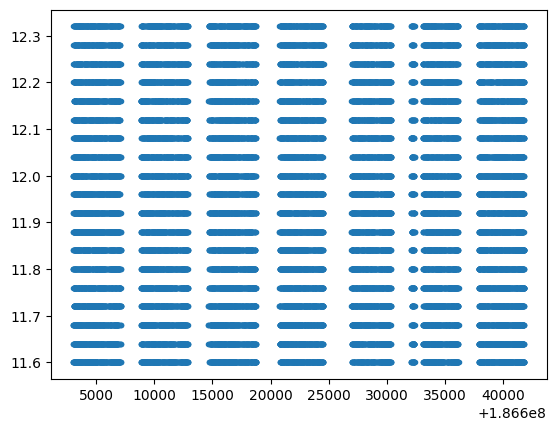

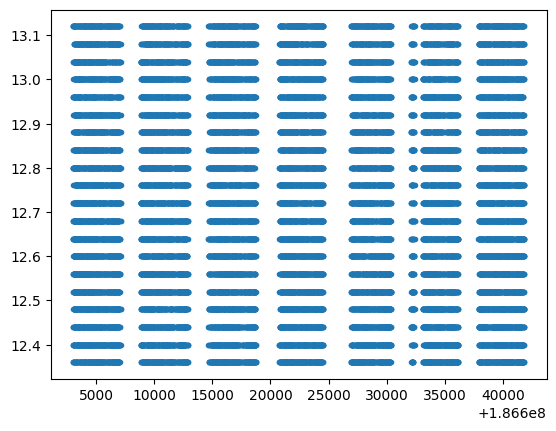

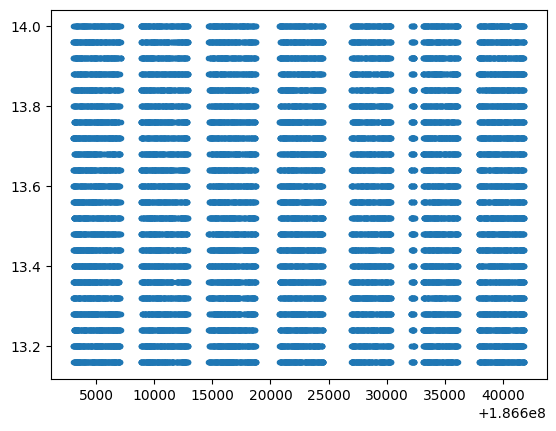

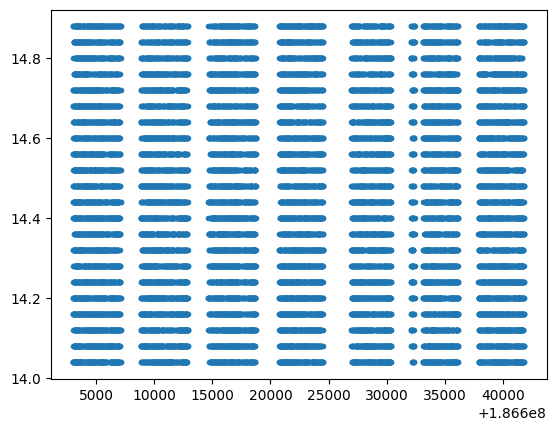

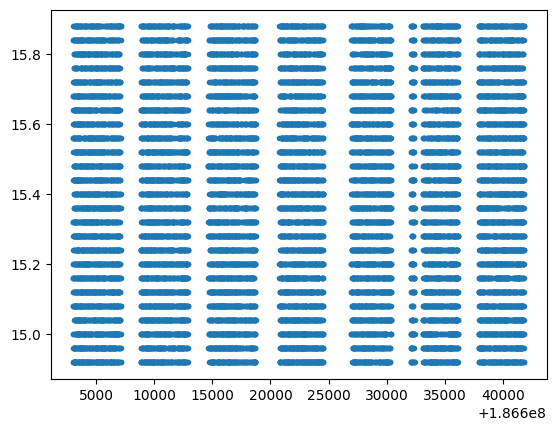

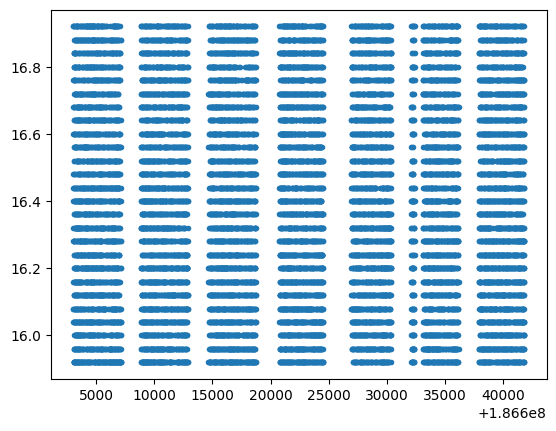

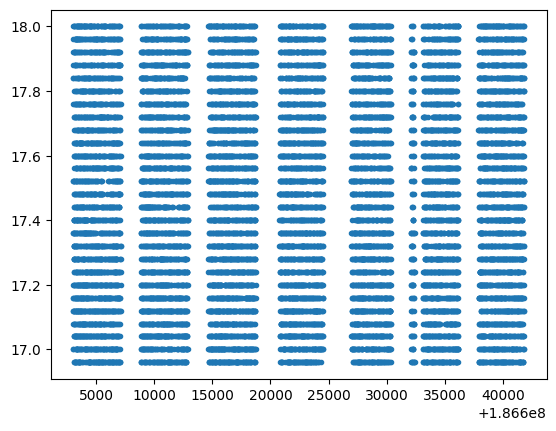

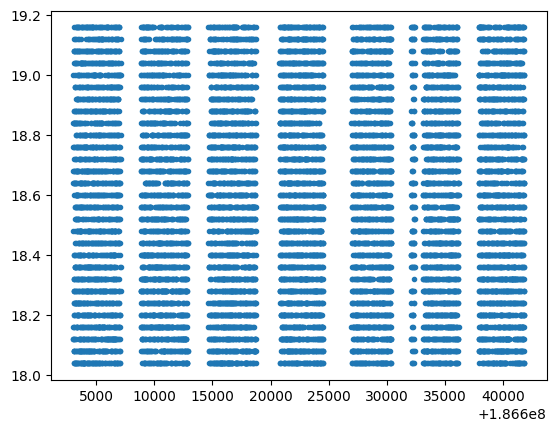

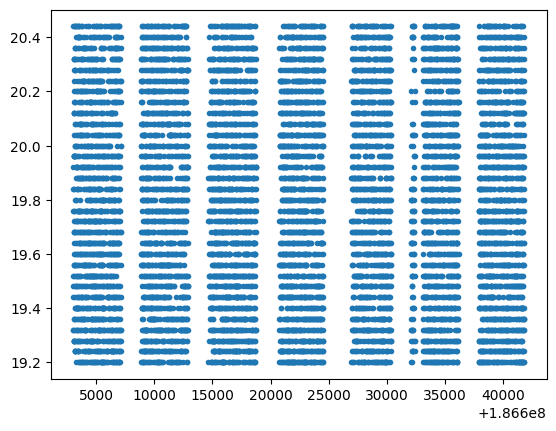

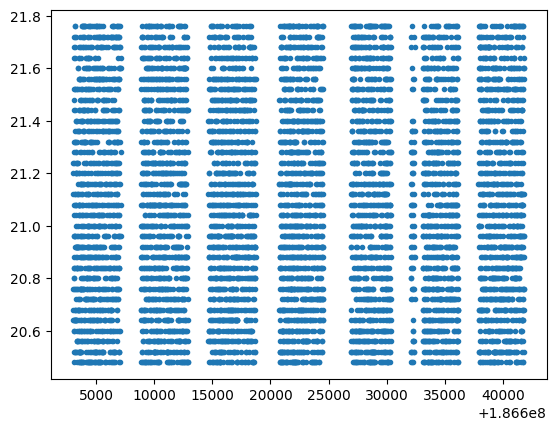

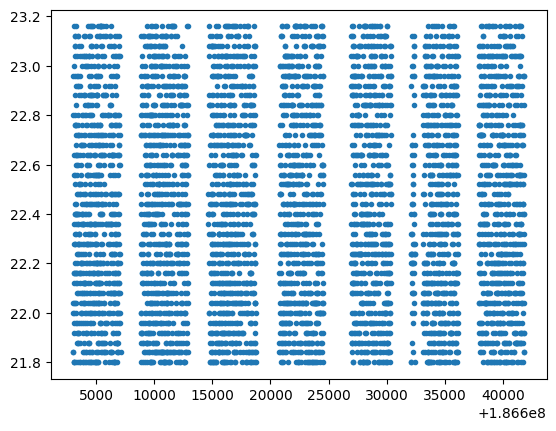

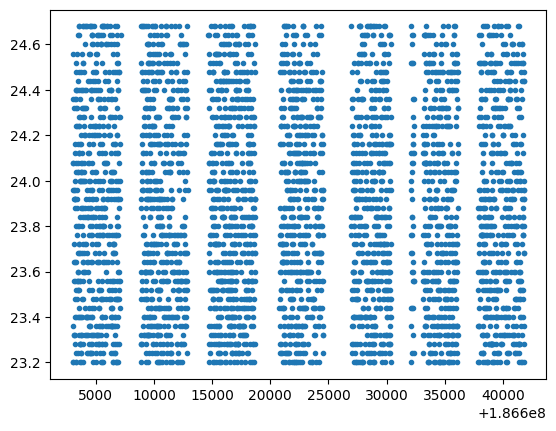

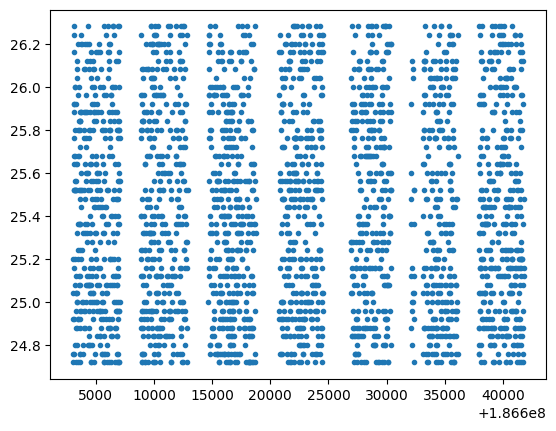

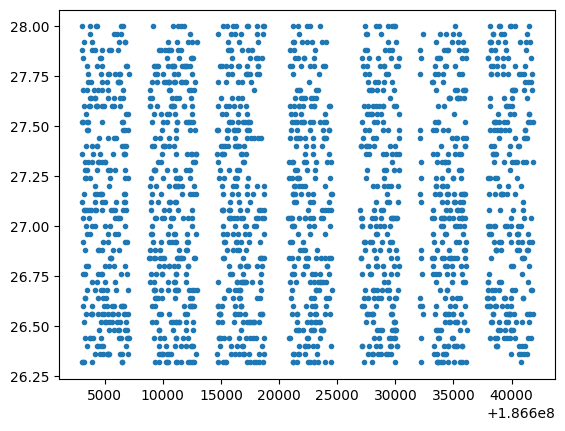

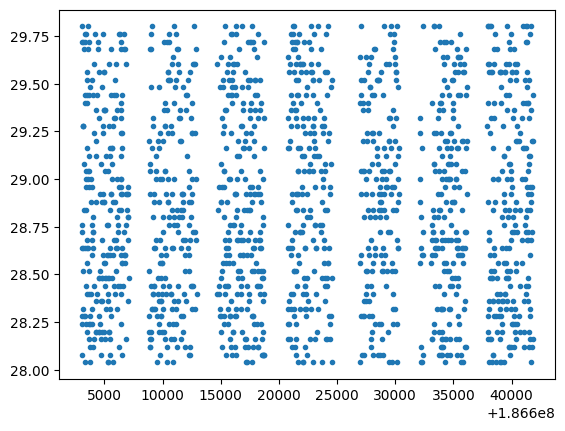

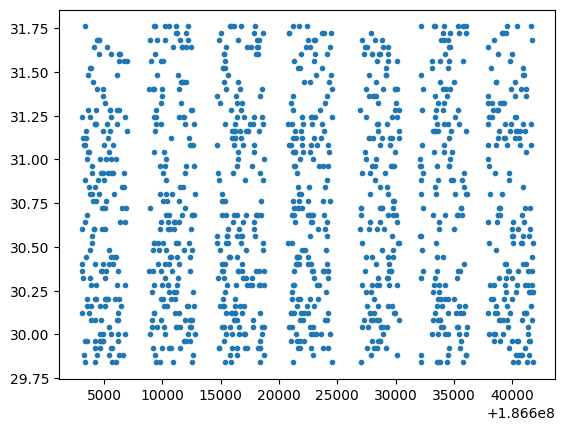

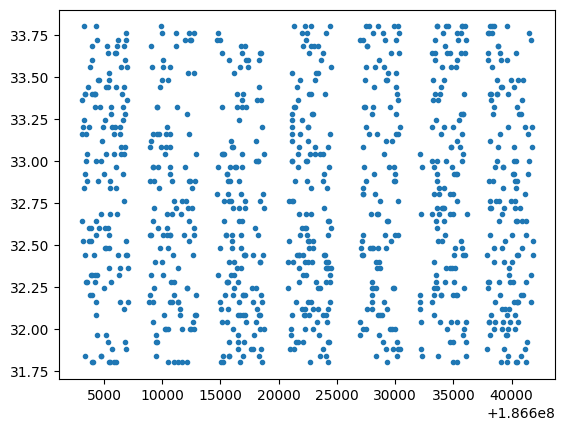

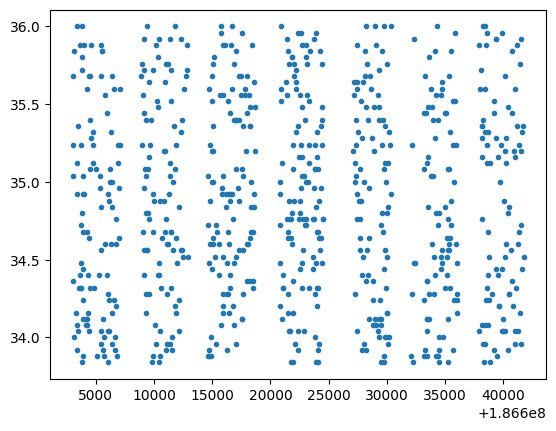

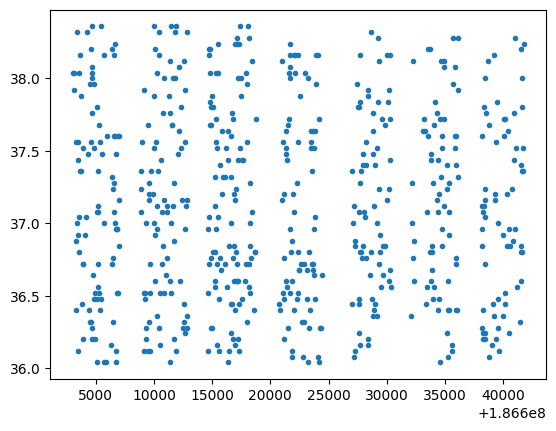

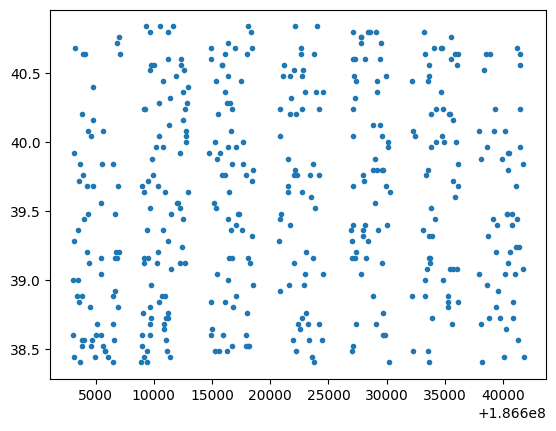

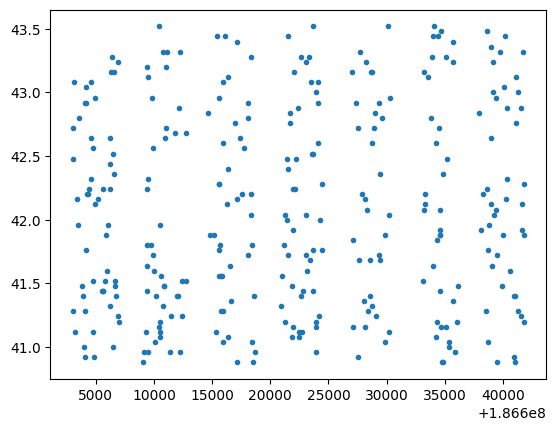

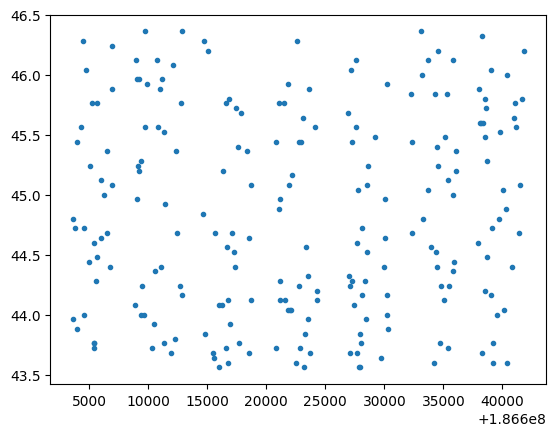

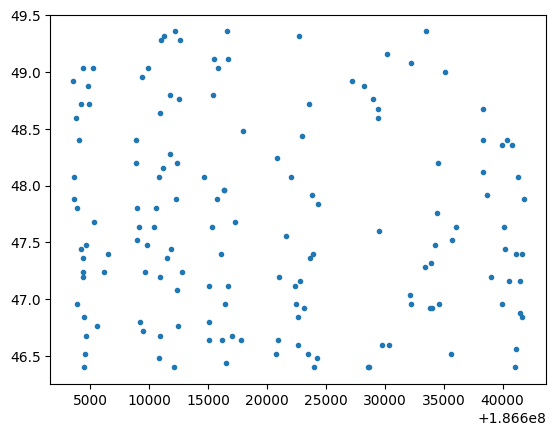

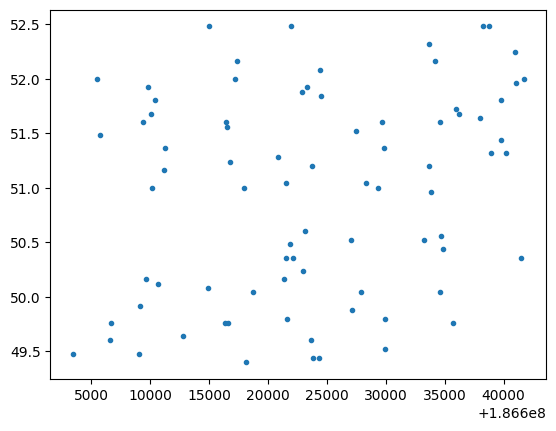

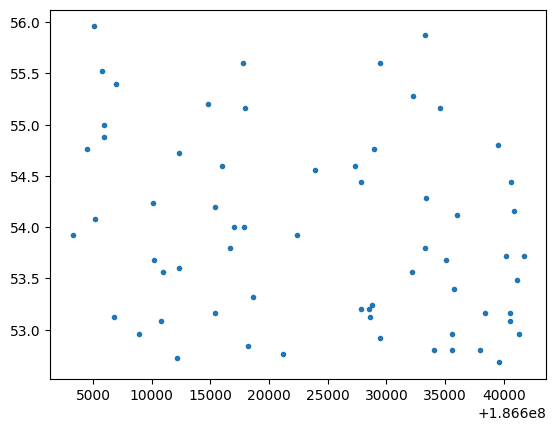

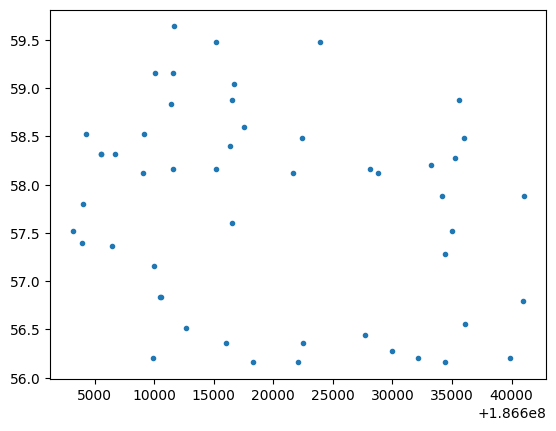

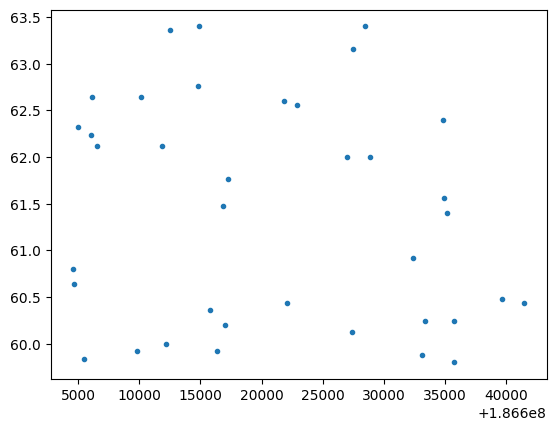

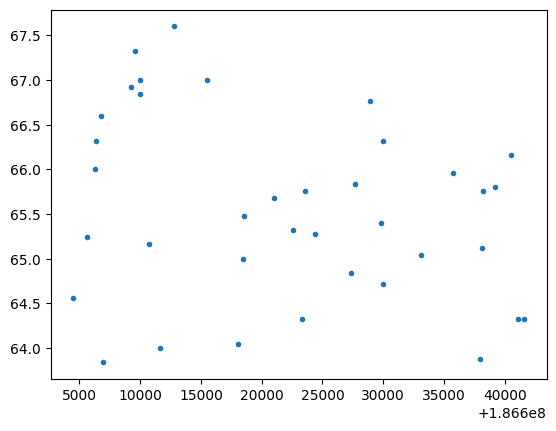

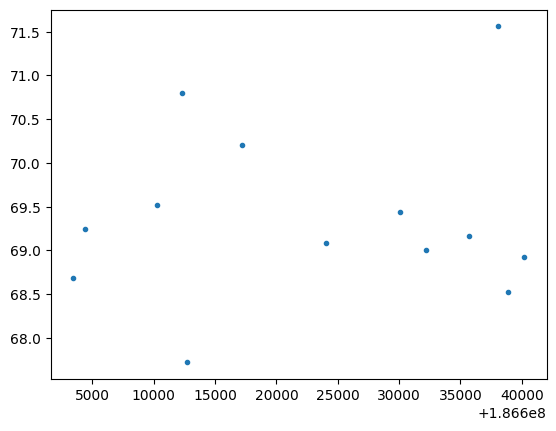

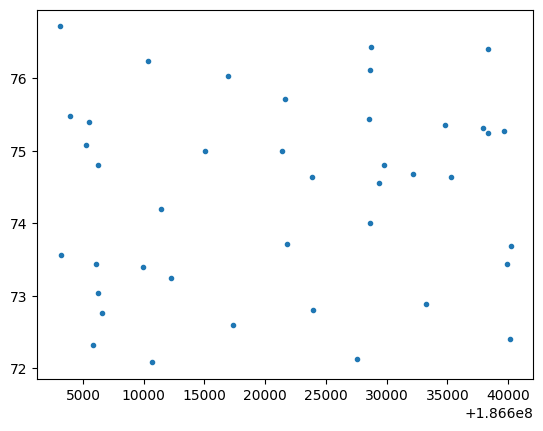

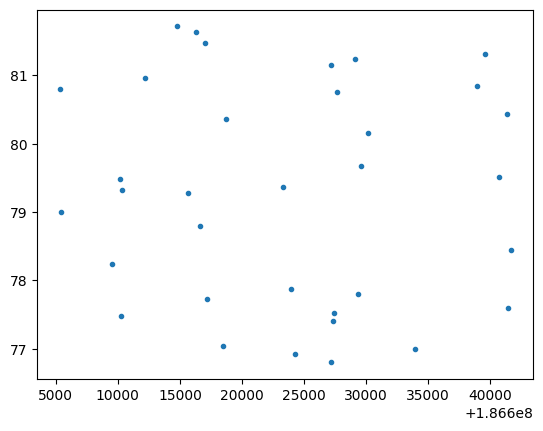

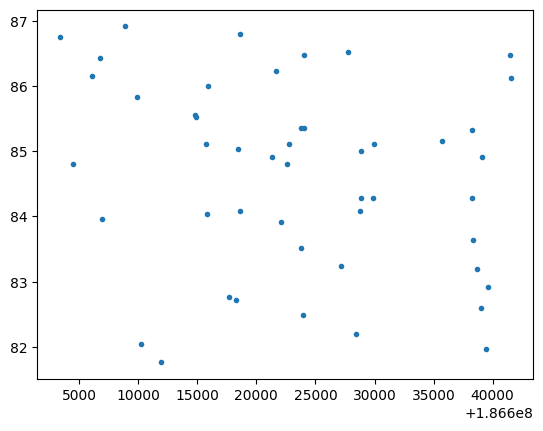

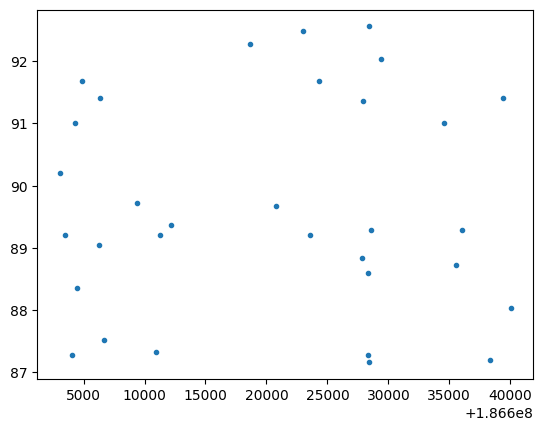

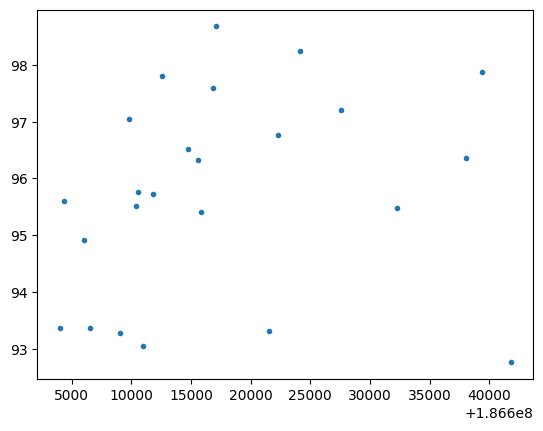

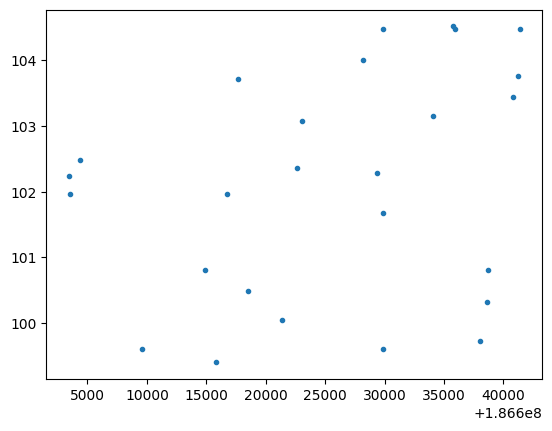

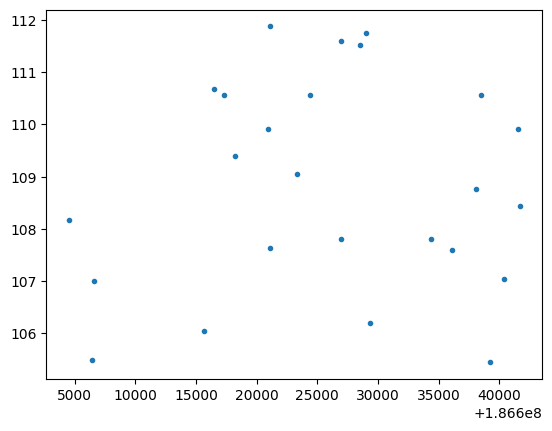

In [13]:
for i in range(np.abs(num_segments)):
    plt.plot(energy_time_segments[i], energy_segments[i], '.')
    plt.show()

## Plotting the energy pulse profile matrix 

5
2
5
2
9
6
2
7
10
2
10
10
6
5
8
9
6
9
6
4
5
5
5
4
3
4
3
2
2
2
2
5


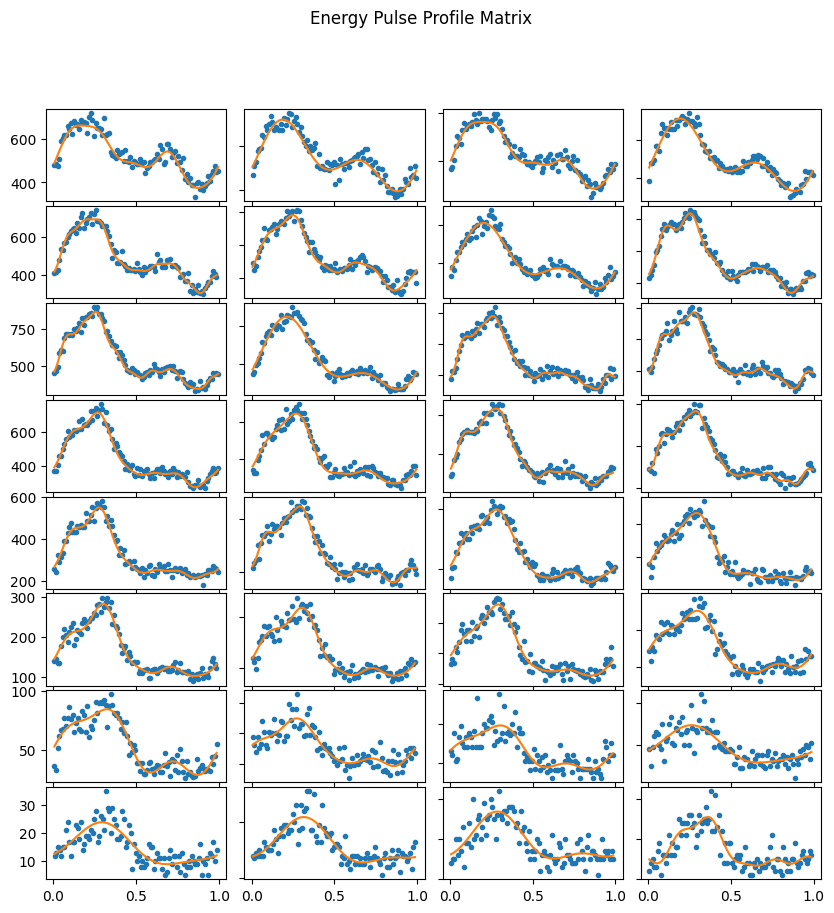

In [23]:
reload(IF)

energy_orders, energy_model_phases, energy_counts, energy_phasefold_time=IF.pulse_profile_matrix(energy_time_segments, 
                                                                                                 Time_phase_data['TIME'][0], 
                                                                                                 [guess_freq], 'Energy Pulse Profile Matrix', 32, 0.01, 0.2)



In [121]:
print(len(energy_orders))

22


## Using bootstrap method to find the uncertainty on the phase 

## Re-making the bootstrapping method to be more general and calculating the phase and RMS for each energy pulse profile (i.e. making sure the new functions work)

In [32]:
reload(IF)
RMS_error = np.ones(len(energy_counts))
num_realizations = 500
for i in range(len(energy_counts)):
    RMS_error[i] = IF.bootstrap_total(energy_counts[i], num_realizations, IF.RMS_calculator, energy_orders[i])
    print('RMS is:',IF.RMS_calculator(energy_counts[i], energy_orders[i]), ' +/- ', RMS_error[i])
    print('First phase is:', IF.get_first_harmonic_phase(energy_counts[i]), ' +/- ', IF.bootstrap_total(energy_counts[i], num_realizations, IF.get_first_harmonic_phase)) 
    print('\n')

RMS is: 0.11876963397333874  +/-  0.0030962145787447864
First phase is: -1.5863463948719023  +/-  0.03459368005639625


RMS is: 0.09853087406814394  +/-  0.0032968767969989037
First phase is: -1.5625872393408606  +/-  0.030682985831503747


RMS is: 0.1467986980749149  +/-  0.003518996425900729
First phase is: -1.5519923669411106  +/-  0.028418619361120313


RMS is: 0.13066563173266577  +/-  0.003232054367103775
First phase is: -1.534374564122854  +/-  0.023193655532015692


RMS is: 0.17146129237326593  +/-  0.003251417456066402
First phase is: -1.5594097960206845  +/-  0.022193795260896754


RMS is: 0.17889095527316975  +/-  0.0031126955708529504
First phase is: -1.5459915854846682  +/-  0.018671487763592166


RMS is: 0.15581655011076054  +/-  0.003088437258255656
First phase is: -1.5031826046536598  +/-  0.020062797028141195


RMS is: 0.1911864068014951  +/-  0.0031243737926736946
First phase is: -1.4805929570142689  +/-  0.017392331028224347


RMS is: 0.20323126067436412  +/-  0.0030

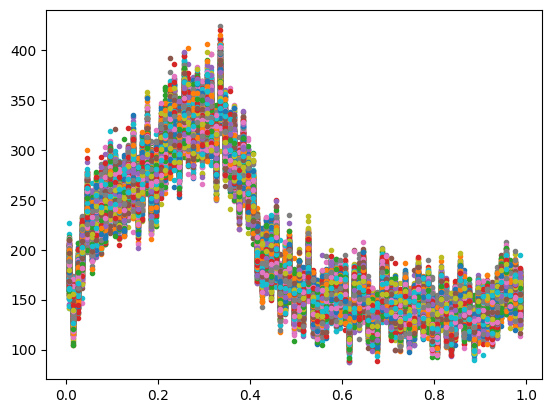

In [33]:
for i in range(num_realizations):
    plt.plot(energy_phasefold_time[19], IF.bootstrap_generate(energy_counts[19], num_realizations)[i], '.')
plt.show()

## Plotting the RMS against energy 

Text(0.5, 1.0, 'Plot of the RMS against Energy for Bootstrap')

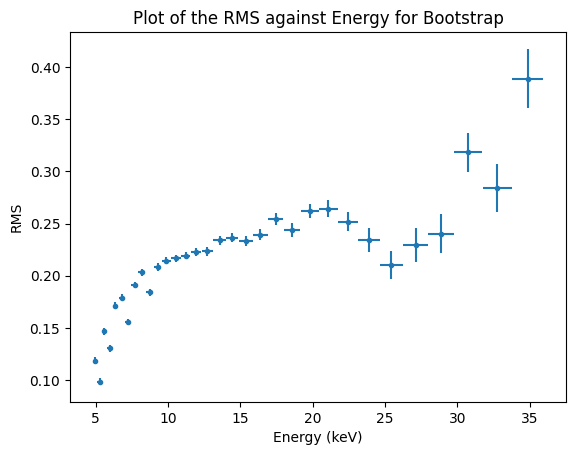

In [35]:
reload(IF)
RMSs = np.zeros(len(energy_counts))
RMS_error = np.ones(len(energy_counts))
E_rror = np.ones(len(energy_counts))
avg = np.zeros(len(energy_counts))

for i in range(len(energy_counts)):
    RMS_error[i] = IF.bootstrap_total(energy_counts[i], num_realizations, IF.RMS_calculator, energy_orders[i])
    RMSs[i] = IF.RMS_calculator(energy_counts[i], energy_orders[i])
    E_rror[i] = 0.5*(max(energy_segments[i])-min(energy_segments[i]))
    avg[i] = np.mean(energy_segments[i])
    
fig, ax = plt.subplots(1, 1)
ax.errorbar(avg, RMSs, xerr=E_rror, yerr=RMS_error, fmt='.')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('RMS')
ax.set_title('Plot of the RMS against Energy for Bootstrap')

#plt.savefig('/Users/samsonmercier/Desktop/RMS_vs_Energy.pdf')